# Imports
Importing the required packages for clacluations and visual representations


In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

### Data Exploring

Exploring the dataset provided 

In [216]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, names = ["ID","Diagnosis",
            "M-Radius","SE-Radius","WL-Radius",
            "M-Texture","SE-Texture","WL-Texture",
            "M-Perimeter","SE-Perimeter","WL-Perimeter",
            "M-Area","SE-Area","WL-Area",
            "M-Smoothness","SE-Smoothness","WL-Smoothness",
            "M-Compactness","SE-Compactness","WL-Compactness",
            "M-Concavity","SE-Concavity","WL-Concavity",
            "M-Concave_P","SE-Concave_P","WL-Concave_P",
            "M-Symmetry","SE-Symmetry","WL-Symmetry",
            "M-Fractal_D","SE-Fractal_D","WL-Fractal_D"
            ])

In [217]:
df.head()

,ID,Diagnosis,M-Radius,SE-Radius,WL-Radius,M-Texture,SE-Texture,WL-Texture,M-Perimeter,SE-Perimeter,...,WL-Concavity,M-Concave_P,SE-Concave_P,WL-Concave_P,M-Symmetry,SE-Symmetry,WL-Symmetry,M-Fractal_D,SE-Fractal_D,WL-Fractal_D
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [218]:
df.shape

(569, 32)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              569 non-null    int64  
 1   Diagnosis       569 non-null    object 
 2   M-Radius        569 non-null    float64
 3   SE-Radius       569 non-null    float64
 4   WL-Radius       569 non-null    float64
 5   M-Texture       569 non-null    float64
 6   SE-Texture      569 non-null    float64
 7   WL-Texture      569 non-null    float64
 8   M-Perimeter     569 non-null    float64
 9   SE-Perimeter    569 non-null    float64
 10  WL-Perimeter    569 non-null    float64
 11  M-Area          569 non-null    float64
 12  SE-Area         569 non-null    float64
 13  WL-Area         569 non-null    float64
 14  M-Smoothness    569 non-null    float64
 15  SE-Smoothness   569 non-null    float64
 16  WL-Smoothness   569 non-null    float64
 17  M-Compactness   569 non-null    flo

### Data Cleaning

In [220]:
df.duplicated().sum()

0

In [221]:
df.isnull().sum()

ID                0
Diagnosis         0
M-Radius          0
SE-Radius         0
WL-Radius         0
M-Texture         0
SE-Texture        0
WL-Texture        0
M-Perimeter       0
SE-Perimeter      0
WL-Perimeter      0
M-Area            0
SE-Area           0
WL-Area           0
M-Smoothness      0
SE-Smoothness     0
WL-Smoothness     0
M-Compactness     0
SE-Compactness    0
WL-Compactness    0
M-Concavity       0
SE-Concavity      0
WL-Concavity      0
M-Concave_P       0
SE-Concave_P      0
WL-Concave_P      0
M-Symmetry        0
SE-Symmetry       0
WL-Symmetry       0
M-Fractal_D       0
SE-Fractal_D      0
WL-Fractal_D      0
dtype: int64

In [222]:
df.drop('ID',axis=1, inplace= True)

In [223]:
df.head()

,Diagnosis,M-Radius,SE-Radius,WL-Radius,M-Texture,SE-Texture,WL-Texture,M-Perimeter,SE-Perimeter,WL-Perimeter,...,WL-Concavity,M-Concave_P,SE-Concave_P,WL-Concave_P,M-Symmetry,SE-Symmetry,WL-Symmetry,M-Fractal_D,SE-Fractal_D,WL-Fractal_D
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Processing

In [224]:
df['Diagnosis'].replace(['M', 'B'],[1, 0], inplace=True)
y = df['Diagnosis'].values
x = df.drop('Diagnosis', axis=1).values

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)
N = y_train.size

In [226]:
N

549

###Helper functions


In [227]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x*(1-x)

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    return  accuracy_score(labels, predictions > 0.5) 

def ReLU(x):
  return np.maximum(0,x)

def binary_cross_entropy(predictions, labels):
    return -(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)).mean()

###Training attempt

In [ ]:
# hyperparameters
learning_rate = 0.1
epochs = 1000

n_input = 30
n_hidden = 7
n_hidden2 = 2
n_output = 1

np.random.seed(10)
weights_0 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (30, 7)
weights_1 = np.random.normal(scale=0.5, size=(n_hidden, n_hidden2))  # (7, 4)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden2, n_output))  # (4, 1)
bias_0 = np.random.normal(scale=0.5, size=(1, n_hidden))   # (1, 7)
bias_1 = np.random.normal(scale=0.5, size=(1, n_hidden2))  # (1, 4)
bias_2 = np.random.normal(scale=0.5, size=(1, n_output))  # (1, 1)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": [], "binary_cross_entropy": []}
for epoch in range(epochs):
    
    # feedforward
    hidden_layer_inputs1 = np.dot(x_train, weights_0) + bias_0
    hidden_layer_outputs1 = sigmoid(hidden_layer_inputs1)

    hidden_layer_inputs2 = np.dot(hidden_layer_inputs1, weights_1) + bias_1
    hidden_layer_outputs2 = np.tanh(hidden_layer_inputs2)

    output_layer_inputs = np.dot(hidden_layer_outputs2, weights_2) + bias_2
    output_layer_outputs = sigmoid(output_layer_inputs)

    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    bce = binary_cross_entropy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    monitoring["binary_cross_entropy"].append(bce)
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train.reshape(N,1)
    output_layer_delta = output_layer_error * ReLU(output_layer_outputs)
    
    hidden_layer_error2 = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta2 = hidden_layer_error2 * dsigmoid(hidden_layer_outputs2)

    hidden_layer_error = np.dot(hidden_layer_error2, weights_1.T)
    hidden_layer_delta = hidden_layer_error * dsigmoid(hidden_layer_outputs1)

    
    # weight and bias updates
    weights_2_update = np.dot(hidden_layer_outputs2.T, output_layer_delta) 
    weights_1_update = np.dot(hidden_layer_outputs1.T, hidden_layer_delta2) 
    weights_0_update = np.dot(x_train.T, hidden_layer_delta) 
    bias_2_update = np.sum(output_layer_delta, axis = 0, keepdims = True) 
    bias_1_update = np.sum(hidden_layer_delta2, axis = 0, keepdims = True) 
    bias_0_update = np.sum(hidden_layer_delta, axis = 0, keepdims = True) 

    bias_2 = bias_2_update * learning_rate / N
    bias_1 = bias_1_update * learning_rate / N
    bias_0 = bias_0_update * learning_rate / N
    weights_2 = weights_2 - learning_rate * weights_2_update / N
    weights_1 = weights_1 - learning_rate * weights_1_update / N
    weights_0 = weights_0 - learning_rate * weights_0_update / N

monitoring_df = pd.DataFrame(monitoring)

In [233]:
print("Mean Squared Error   : ",mse,"\nAccuracy\t     : ",acc, "\nBinary Cross Entropy : ", bce)

Mean Squared Error   :  64.5974499089253 
Accuracy	     :  0.6211293260473588 
Binary Cross Entropy :  0.6604005201171813


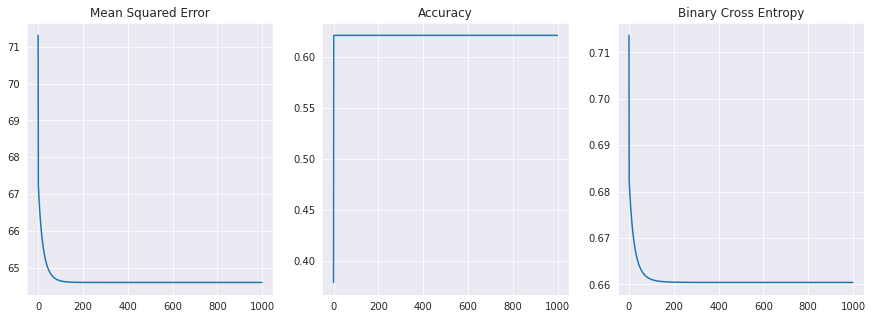

In [234]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");
monitoring_df.binary_cross_entropy.plot(ax=axes[2], title="Binary Cross Entropy");